Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Understanding dataset
#### Importing the dataset

In [2]:
df=pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# view all the columns in the datasets
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
# view the shape of the dataset
df.shape

(801, 41)

In [5]:
# more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
# count the null values in each columns
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


## Handling missing values

The **height_m**(height in meters) column contains 20 missing values. To handle these, we can fill them with the median if the distribution is skewed or with the mean if it is not. The height_m column is significant, and dropping the 20 rows with missing values would impact the analysis since the total number of rows is only 801

Skewness: 5.0800157096334875


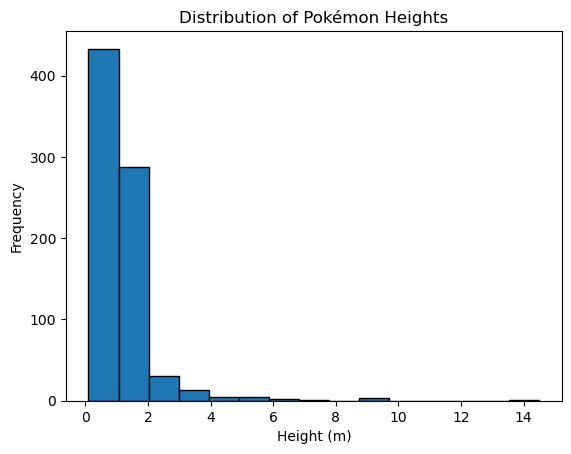

In [7]:
heights = df['height_m'].dropna()

# find the skewness of the height 
skewness = heights.skew()
print(f"Skewness: {skewness}")

# Plot histogram to visualize the height distribution
plt.hist(heights,bins=15,edgecolor='black')
plt.title('Distribution of Pokémon Heights')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.show()

From above **skewness is 5.0800157096334875(strongly positively skewed)**. We can see that on the above histogram too. So, filling NaN value in **height_m** column with **median value of the same column**.

In [8]:
# filling nan value in height_m with median of same column
med=df['height_m'].median()
df['height_m']=df['height_m'].fillna(med)

The **percentage_male**(percentage of the species that are male) column contains 98 NaN values, which represent genderless species. **These values are left as NaN to maintain the distinction between gendered and genderless species.** This decision is based on the fact that genderless species do not have a meaningful percentage of males, and imputing these values could introduce unnecessary bias into the analysis

**type2**(The Secondary Type of the Pokemon) has 384 missing values. This column is useful as we may want to view the secondary type of pokemon.So, we can fill the missing value with frequently repeating type (i.e. with mode of the column). But type2 of 384 pokemon is missing i.e. about 47%, imputing might introduce bias here. From google search found out that the missing value in type2 column indicates that particular pokemon has no secondary type. So, can leave NaN value as it is or fill with the placeholder "No Type". Let's go with the placeholder "No Type".

In [9]:
df['type2']=df['type2'].fillna("No Type")

The **weight_kg**(The Weight of the Pokemon in kilograms) column contains 20 missing values. To handle these, we can fill them with the median if the distribution is skewed or with the mean if it is not. The weight_kg column is significant, and dropping the 20 rows with missing values would impact the analysis since the total number of rows is only 801

Skewness: 4.871044454630607


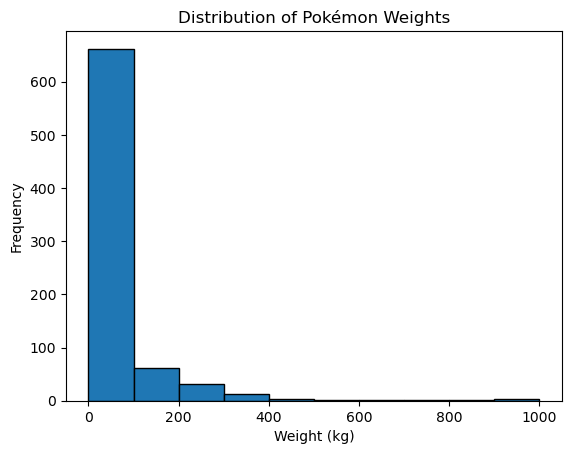

In [10]:
weights = df['weight_kg'].dropna()

# find the skewness of the weight 
skewness = weights.skew()
print(f"Skewness: {skewness}")

# Plot histogram to visualize the height distribution
plt.hist(weights,bins=10,edgecolor='black')
plt.title('Distribution of Pokémon Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

From above **skewness is 4.871044454630607(strongly positively skewed)**. We can see that on the above histogram too. So, filling NaN value in **weight_kg** column with **median value of the same column**.

In [11]:
# filling nan value in weight_kg with median of same column
wt_med=df['weight_kg'].median()
df['weight_kg']=df['weight_kg'].fillna(wt_med)

In [12]:
# count the null values in each columns
df.isnull().sum()

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m              0
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg             0
generation            0
is_legendary          0
dtype: int64

## Data Exploration

#### How many unique Pokémon are there in the dataset?

#### What are the most common Pokémon types?

#### How many legendary Pokémon are there?

#### What is the average HP (Hit Points) of all Pokémon?

#### Which Pokémon has the highest total stats (HP, Attack, Defense, Special Attack, Special Defense, Speed)?

#### Is there a correlation between HP and Defense stats?

#### How does the average weight of Pokémon vary by type?

#### What is the distribution of Pokémon by generation?
Visualize how Pokémon are distributed across different generations.

#### Which Pokémon type has the highest average attack power?

#### Compare the average stats (HP, Attack, Defense) of Fire-type Pokémon vs. Water-type Pokémon.

#### Which Pokémon has the highest speed?

#### How does the distribution of legendary Pokémon change across generations?
- analyze how the number and characteristics of legendary Pokémon have evolved across different generations of the Pokémon series
- can use the bar plot to visualize the distribution of legendary pokemon across generations

#### Create a bar chart showing the count of each Pokémon type.

#### Plot a scatter plot of Attack vs. Defense for all Pokémon

#### Generate a pie chart of legendary vs. non-legendary Pokémon.

#### Create a box plot of Speed by Generation.
learn about box plot: 
https://en.wikipedia.org/wiki/Box_plot
https://www.geeksforgeeks.org/box-plot/

#### Visualize the distribution of HP by Type using a histogram.
Find how HP varies across different types.